In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
Pokemon_data=pd.read_csv("Pokemon.csv") #Dataset obtained from Kaggle
Pokemon_data.head(10)

,Serial,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


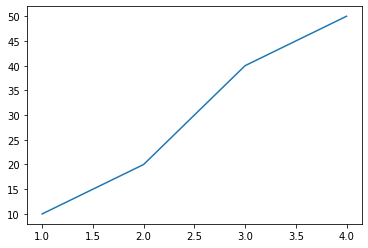

In [20]:
fig,ax=plt.subplots()
ax.plot([1,2,3,4],[10,20,40,50]);

In [73]:
Pokemon_type=pd.DataFrame(Pokemon_data["Type 1"].value_counts())
Pokemon_type=Pokemon_type.reset_index()
Pokemon_type.columns=['Type', 'Count']
Pokemon_type

,Type,Count
0,Water,28
1,Normal,22
2,Poison,14
3,Grass,12
4,Fire,12
5,Bug,12
6,Electric,9
7,Rock,9
8,Ground,8
9,Psychic,8


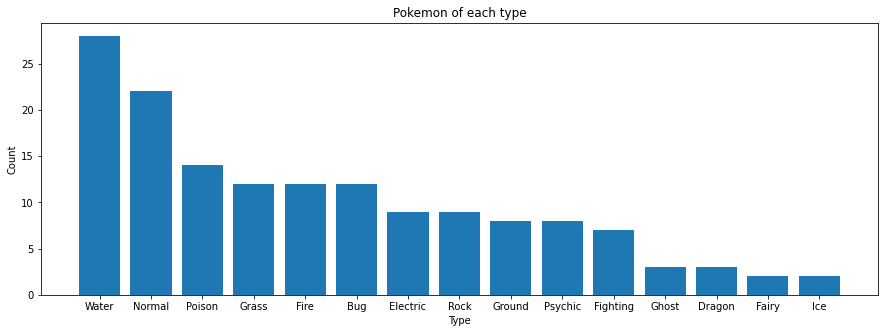

In [90]:
fig,ax=plt.subplots(figsize=(15,5))
ax.bar(Pokemon_type["Type"],Pokemon_type["Count"])
ax.set(title='Pokemon of each type',
      xlabel='Type',
      ylabel='Count');

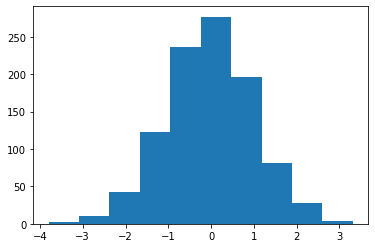

In [92]:
# Histogram
x=np.random.randn(1000)
fig,ax=plt.subplots()
ax.hist(x);

## Subplots Option Number 01

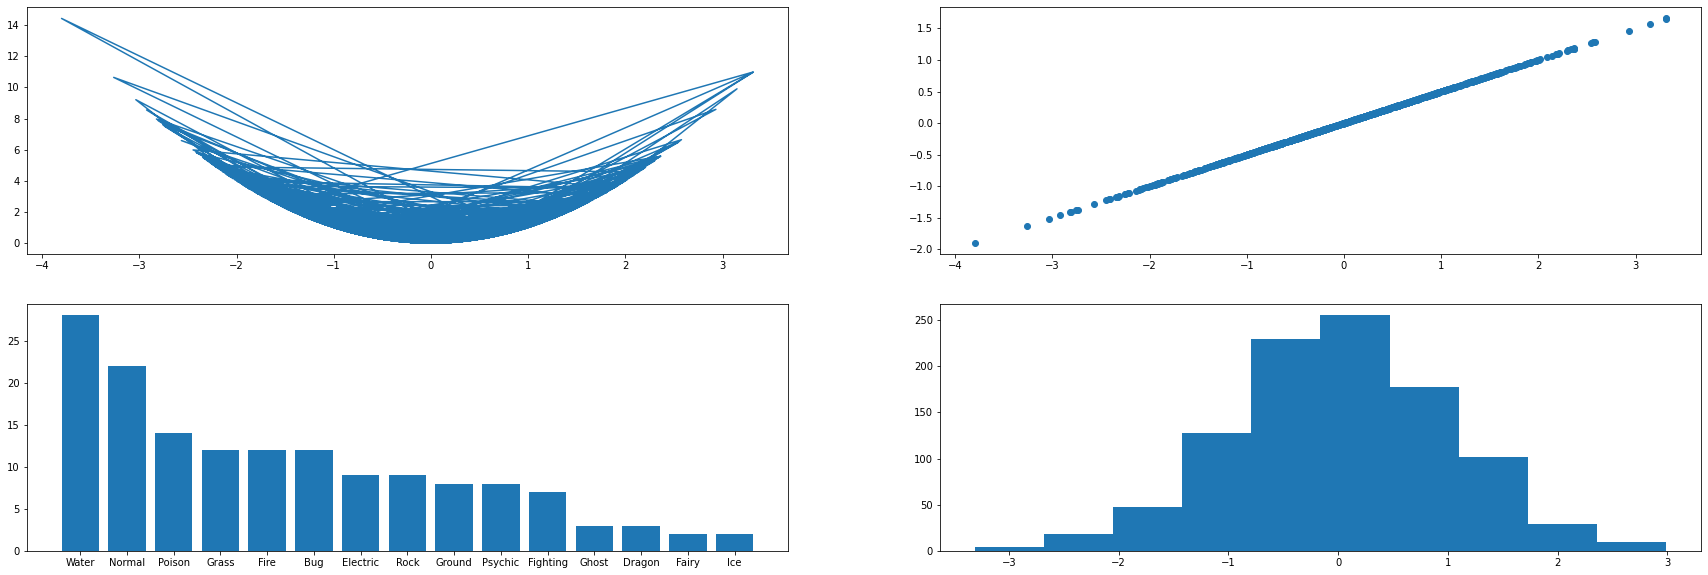

In [103]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2, ncols=2, figsize=(30,10))
ax1.plot(x,x**2)
ax2.scatter(x,x/2)
ax3.bar(Pokemon_type["Type"],Pokemon_type["Count"])
ax4.hist(np.random.randn(1000));

## Subplots Option Number 02

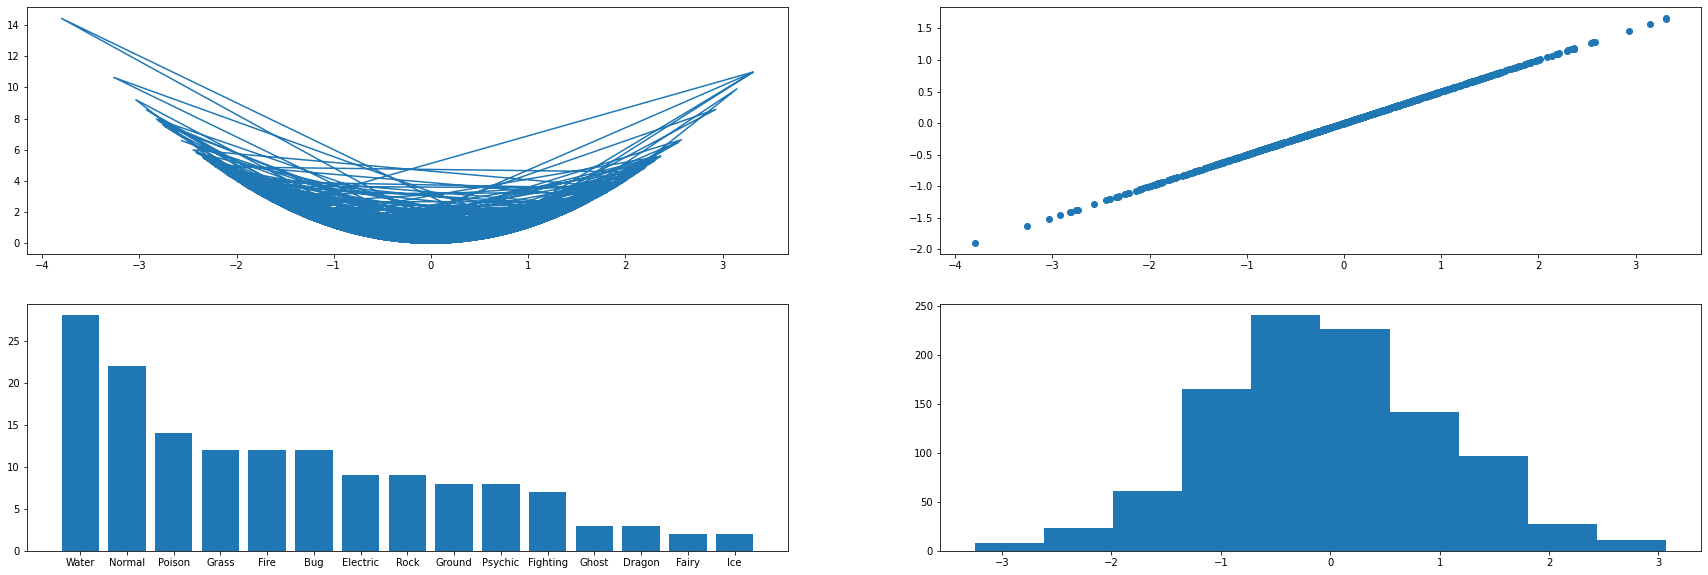

In [105]:
fig,ax=plt.subplots(nrows=2, ncols=2, figsize=(30,10))
ax[0,0].plot(x,x**2)
ax[0,1].scatter(x,x/2)
ax[1,0].bar(Pokemon_type["Type"],Pokemon_type["Count"])
ax[1,1].hist(np.random.randn(1000));

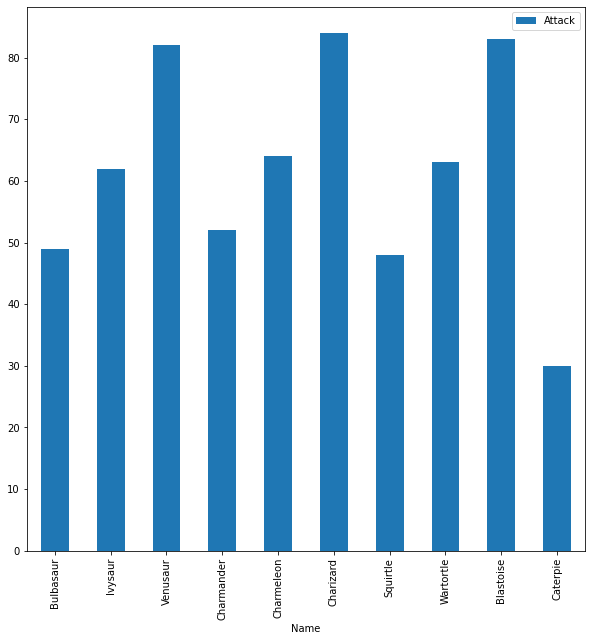

In [10]:
# Random Bar Graph
Pokemon_data[:10].plot(x="Name", y="Attack", kind='bar', figsize=(10,10));

<AxesSubplot:ylabel='Frequency'>

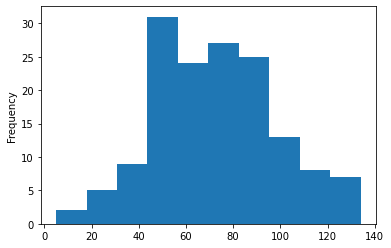

In [12]:
# Histogram
Pokemon_data["Attack"].plot.hist()

In [4]:
# More experimentation
attack_more_80=Pokemon_data[Pokemon_data["Attack"]>80]
len(attack_more_80),attack_more_80.head()

(56,
     Serial       Name  Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
 2        3   Venusaur   Grass  Poison    525  80      82       83      100   
 5        6  Charizard    Fire  Flying    534  78      84       78      109   
 8        9  Blastoise   Water     NaN    530  79      83      100       85   
 14      15   Beedrill     Bug  Poison    395  65      90       40       45   
 19      20   Raticate  Normal     NaN    413  55      81       60       50   
 
     Sp. Def  Speed  Stage  Legendary  
 2       100     80      3      False  
 5        85    100      3      False  
 8       105     78      3      False  
 14       80     75      3      False  
 19       70     97      2      False  )

<AxesSubplot:xlabel='Name', ylabel='Defense'>

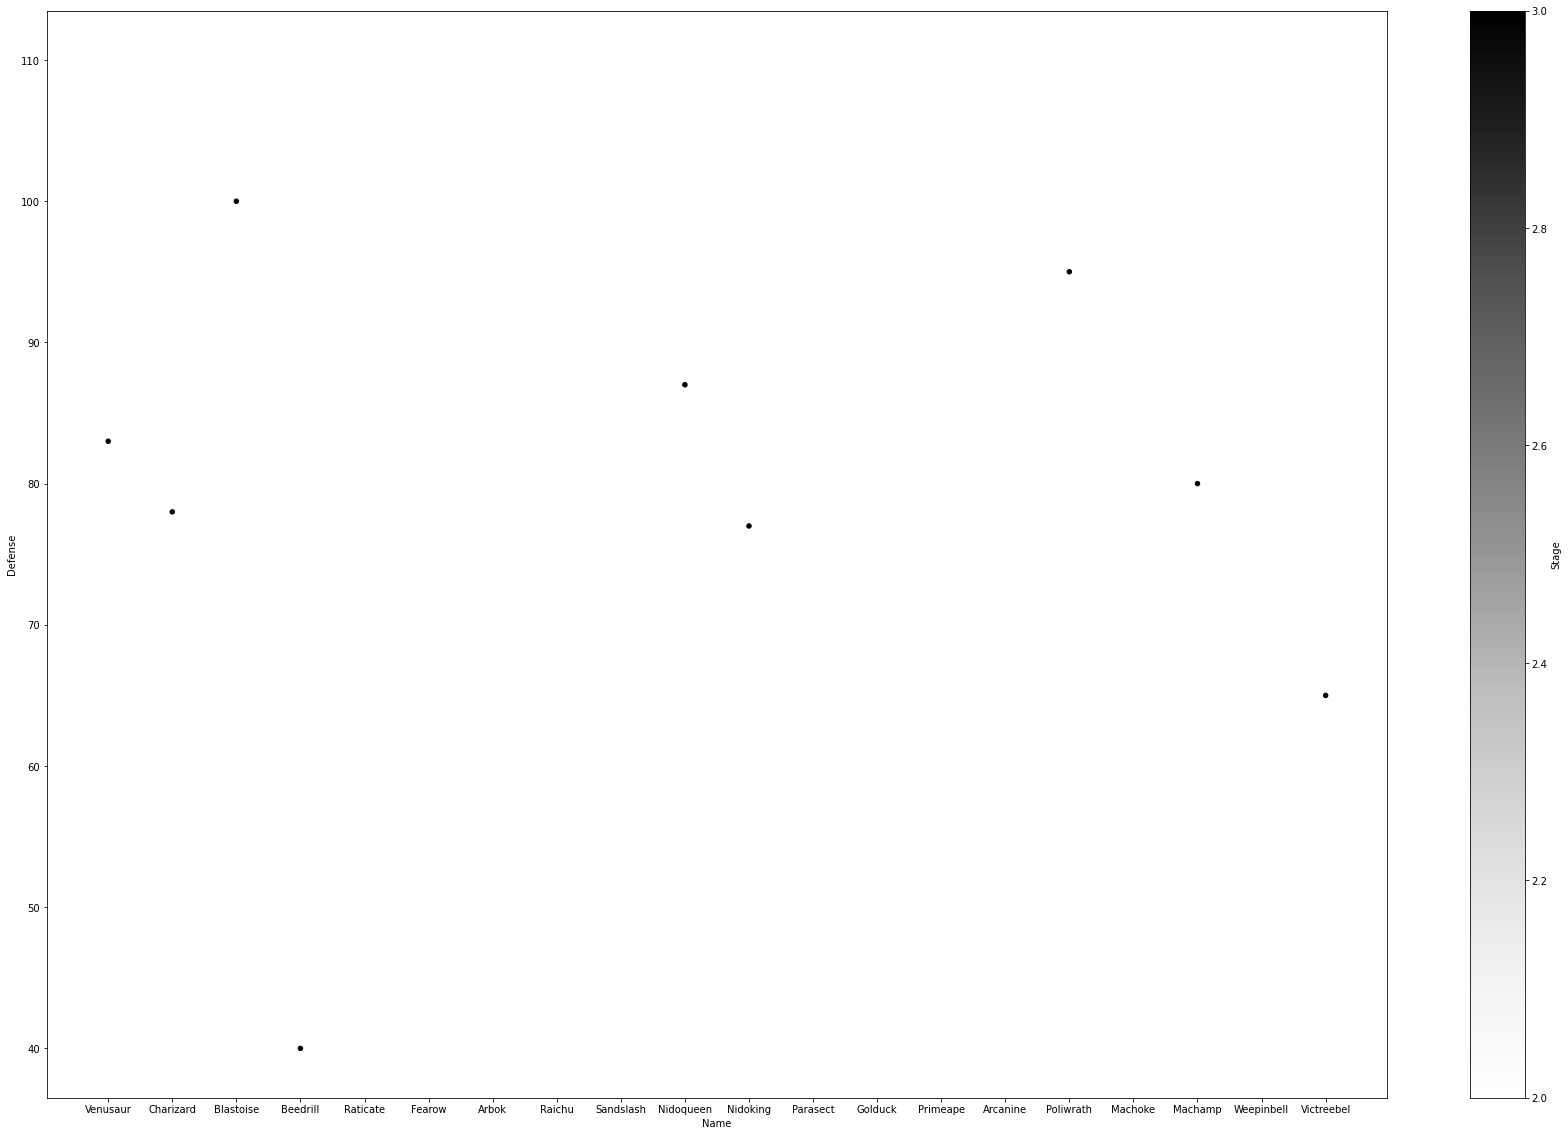

In [32]:
fig,ax=plt.subplots(figsize=(30,20))
attack_more_80[:20].plot(kind="scatter",
    x='Name',
    y='Defense',
    c='Stage',
    ax=ax)

In [ ]:
attack_more_80["Legendary_ind"]=np.where(attack_more_80["Legendary"]==False,'No','Yes');

In [86]:
attack_more_80.rename(columns={'Lengendary_ind':'Legendary_ind'},inplace=True);

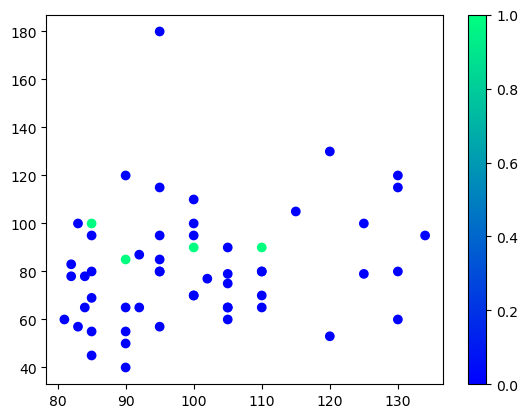

In [34]:
# Mapping showing Legendary vs Non Legendary
# Legendary = Green 
# Non-Legendary = Blue
plt.style.use('default')
prop=attack_more_80["Legendary"]
x=attack_more_80["Attack"]
y=attack_more_80["Defense"]
plt.scatter(x,y,c=prop,cmap='winter')
cbar=plt.colorbar();

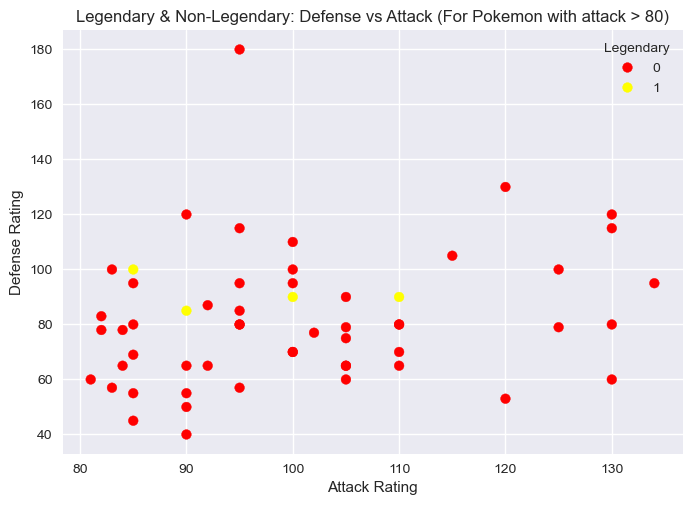

In [36]:
# One other method
plt.style.use('seaborn') # Chnaging the default style of matplotlib

fig,ax=plt.subplots()
scatter=ax.scatter(x=attack_more_80["Attack"],
                  y=attack_more_80["Defense"],
                  c=attack_more_80["Legendary"],
                  cmap='autumn')

ax.set(title="Legendary & Non-Legendary: Defense vs Attack (For Pokemon with attack > 80)",
      xlabel="Attack Rating",
      ylabel='Defense Rating')

ax.legend(*scatter.legend_elements(),title = "Legendary")

In [62]:
# Saving the plot using code
fig.savefig("Attack vs Defense(For Pokemon with attack greater than 80).png")

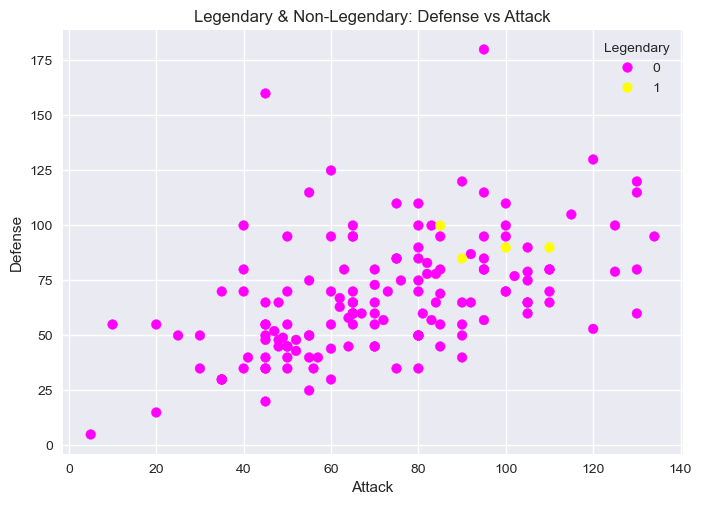

In [60]:
# Plotting for original Pokemon Dataset

fig1,ax=plt.subplots()
scatter=ax.scatter(x=Pokemon_data["Attack"],
                  y=Pokemon_data["Defense"],
                  c=Pokemon_data["Legendary"],
                  cmap="spring")

ax.set(title = 'Legendary & Non-Legendary: Defense vs Attack',
      xlabel="Attack",
      ylabel='Defense')

ax.legend(*scatter.legend_elements(),title = 'Legendary');

In [63]:
fig1.savefig("Attack vs Defense.png")